# Introduction

# Data Profiling and Cleansing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
def plotBars(df,field, fieldID, sort=True, topN=0):
    a = len(df[fieldID].unique())
    print('***Unique count:', a)
    res = (df[[fieldID,field]]
           .groupby(field)
           .count())
    if sort==True: res = res.sort_values(fieldID, ascending=False)
    if topN>0: res = res.head(topN) 
    res.plot.bar(figsize=(16,5))
    y = res[fieldID]
    for i, v in enumerate(y):
        plt.text(i-.1, v+7 , str(v), fontweight='bold')
    m = res.mean() 
    plt.plot([-1,i+1],[m,m],color='red')
    plt.legend(['Mean','Count'])
    plt.title(field)
    plt.show()
    
def dateTrans(cad):
    cad = cad.split('-')
    li = dt.datetime.strptime(cad[0],'%H:%M')
    cad = cad[1].split(';')[0]
    ls = dt.datetime.strptime(cad,'%H:%M')
    return np.array([li,ls])

def getDateDummies(daux):
    dateaRange = pd.date_range(start='1/1/1900', periods=48, freq='30min')
    bux = dateaRange
    cux = daux[0] <= bux 
    cux = cux*(bux <= daux[1])*1
    return cux

def getDateByTypeDummies(daux):
    dateaRange = ([pd.to_datetime(['1900-01-01 00:00:00', '1900-01-01 07:00:00']),
                   pd.to_datetime(['1900-01-01 07:00:00', '1900-01-01 10:00:00']),
                   pd.to_datetime(['1900-01-01 10:00:00', '1900-01-01 13:00:00']),
                   pd.to_datetime(['1900-01-01 13:00:00', '1900-01-01 16:00:00']),
                   pd.to_datetime(['1900-01-01 16:00:00', '1900-01-01 19:00:00']),
                   pd.to_datetime(['1900-01-01 19:00:00', '1900-01-01 23:30:00'])])
    return 0


def getNomDummies(df,field):
    dm = pd.get_dummies(df[field])
    df = pd.concat([df, dm], axis=1)
    return df

def getFreqDummies(df,fieldID, field, n, cat=None, flag=0):
    #Frequency dummy variable
    if flag==0: 
        cat = df[[fieldID,field]].groupby(field).count()/n
    return df[field].apply(lambda x: cat.loc[x]), cat

def transCusine(df):
    df.loc[df.Rcuisine=='Spanish', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Italian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Armenian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Polish', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Dutch-Belgian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='French', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='German', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Continental-European', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Greek', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Eastern_European', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Romanian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='British', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Russian-Ukrainian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Irish', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Swiss', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Hungarian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Scandinavian', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Pacific_Rim', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='Portuguese', 'Rcuisine'] = 'EU'
    df.loc[df.Rcuisine=='American', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Southwestern', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Southern', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='California', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Hawaiian', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Canadian', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Pacific_Northwest', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Tex-Mex', 'Rcuisine'] = 'NA'
    df.loc[df.Rcuisine=='Latin_American', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Mexican', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Brazilian', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Caribbean', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Chilean', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Cuban', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Jamaican', 'Rcuisine'] = 'LA'
    df.loc[df.Rcuisine=='Asian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Mongolian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Japanese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Sushi', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Chinese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Mediterranean', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Afghan', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Vietnamese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Korean', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Thai', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Persian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Turkish', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Australian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Austrian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Israeli', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Malaysian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Peruvian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Cambodian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Tunisian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Filipino', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Indigenous', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Indonesian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Tibetan', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Southeast_Asian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Indian-Pakistani', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Polynesian', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Middle_Eastern', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Burmese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='Lebanese', 'Rcuisine'] = 'ASIA'
    df.loc[df.Rcuisine=='African', 'Rcuisine'] = 'AFRICA'
    df.loc[df.Rcuisine=='Ethiopian', 'Rcuisine'] = 'AFRICA'
    df.loc[df.Rcuisine=='North_African', 'Rcuisine'] = 'AFRICA'
    df.loc[df.Rcuisine=='Moroccan', 'Rcuisine'] = 'AFRICA'
    df.loc[df.Rcuisine=='Fast_Food', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Burgers', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Deli-Sandwiches', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Pizzeria', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Bagels', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Dessert-Ice_Cream', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Hot_Dogs', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Bakery', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Barbecue', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Doughnuts', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Soup', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Regional', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Seafood', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Steaks', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Tea_House', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Tapas', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Eclectic', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Fusion', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Basque', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Dim_Sum', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Cajun-Creole', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='Kosher', 'Rcuisine'] = 'ONEKIND'
    df.loc[df.Rcuisine=='International', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Contemporary', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Fine_Dining', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Diner', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Breakfast-Brunch', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Family', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Game', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Vegetarian', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Organic-Healthy', 'Rcuisine'] = 'OTHER'
    df.loc[df.Rcuisine=='Juice', 'Rcuisine'] = 'DRINK'
    df.loc[df.Rcuisine=='Bar', 'Rcuisine'] = 'DRINK'
    df.loc[df.Rcuisine=='Bar_Pub_Brewery', 'Rcuisine'] = 'DRINK'
    df.loc[df.Rcuisine=='Cafe-Coffee_Shop', 'Rcuisine'] = 'DRINK'
    df.loc[df.Rcuisine=='Cafeteria', 'Rcuisine'] = 'DRINK'


## ---------------------------------------- Ratings ----------------------------------------

In [3]:
ratings = pd.read_csv('3_Ratings.csv')

In [4]:
ratings.info()
ratings.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
userID            1161 non-null object
placeID           1161 non-null int64
rating            1161 non-null int64
food_rating       1161 non-null int64
service_rating    1161 non-null int64
dtypes: int64(4), object(1)
memory usage: 45.4+ KB


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2


In [5]:
ratings.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


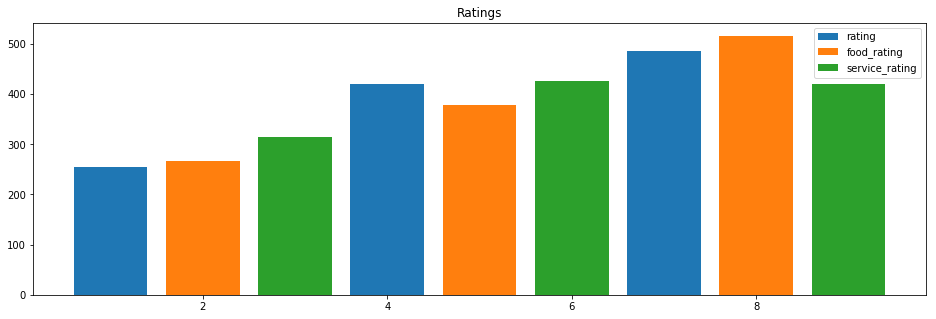

In [6]:
fields = ['rating', 'food_rating', 'service_rating']
plt.figure(figsize=(16,5))
rat = (ratings[['placeID', 'rating']].groupby(['rating']).count())
plt.bar([1,4,7], rat['placeID'])
rat = (ratings[['placeID', 'food_rating']].groupby(['food_rating']).count())
plt.bar([2,5,8], rat['placeID'])
rat = (ratings[['placeID', 'service_rating']].groupby(['service_rating']).count())
plt.bar([3,6,9], rat['placeID'])
plt.legend(fields)
plt.title('Ratings')
plt.show()

***Restaurant count: 130


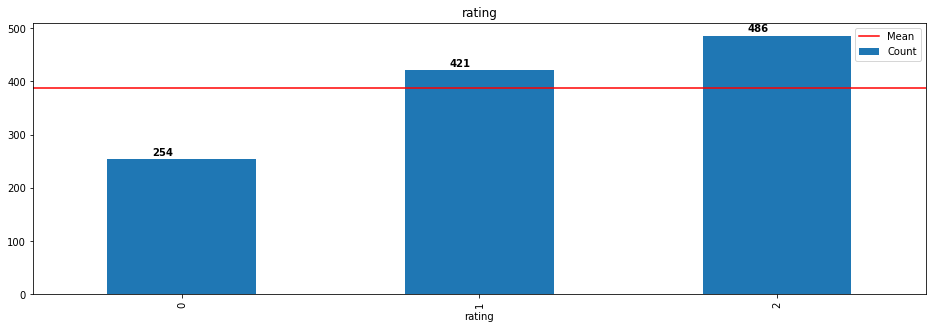

***Restaurant count: 130


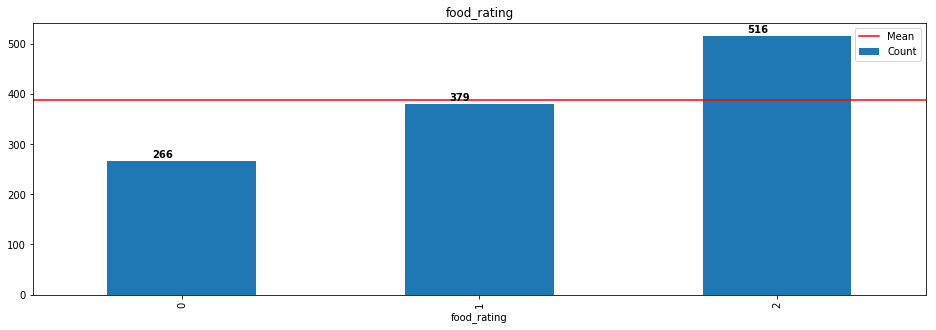

***Restaurant count: 130


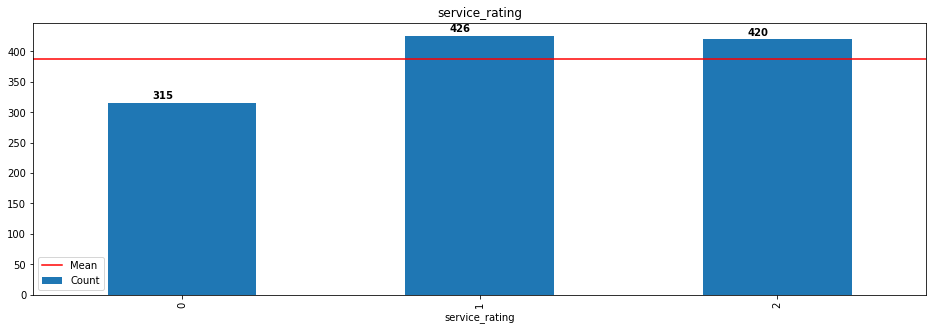

In [7]:
df = ratings[['placeID','rating']]
plotBars(df,'rating','placeID', sort=False)

df = ratings[['placeID','food_rating']]
plotBars(df,'food_rating','placeID', sort=False)

df = ratings[['placeID','service_rating']]
plotBars(df,'service_rating','placeID', sort=False)

## ---------------------------------------- Restaurant ---------------------------------------- 

### Payments:

In [8]:
resPay = pd.read_csv('1_rest1_pagos.csv')
nrpy = len(resPay)
# Cleansing data
resPay.loc[resPay.Rpayment=='Visa', 'Rpayment'] = 'VISA'    
#Frequency dummy variable
resPay['PaymentFreq'], payFreqs = getFreqDummies(resPay,'placeID', 'Rpayment', nrpy)
resPay.info()
resPay.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
placeID        1314 non-null int64
Rpayment       1314 non-null object
PaymentFreq    1314 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.9+ KB


,placeID,Rpayment,PaymentFreq
0,135110,cash,0.380518
1,135110,VISA,0.194064
2,135110,MasterCard-Eurocard,0.147641


***Restaurant count: 615


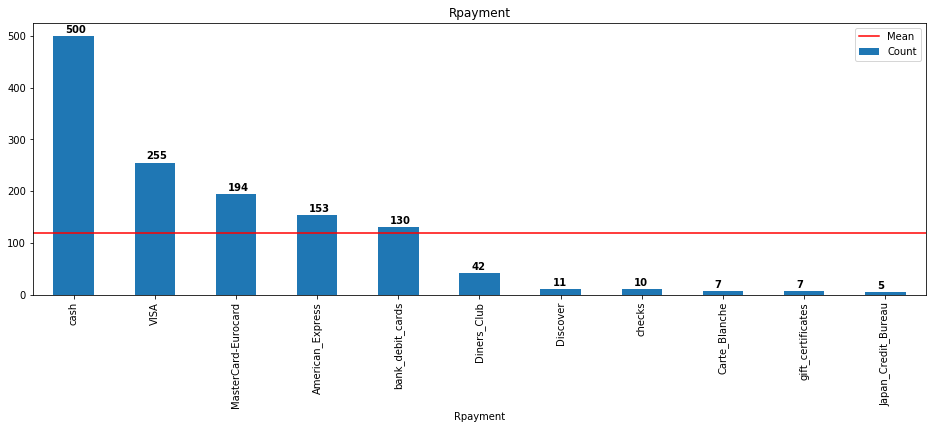

In [9]:
plotBars(resPay,'Rpayment','placeID')  

### kitchen

In [10]:
# Cleansing data
resKit = pd.read_csv('1_rest2_cocina.csv')
nrk = len(resKit)
#Group cuisine by region:
transCusine(resKit)

# Cleansing data
#resKit = getFreqDummys(resKit, 'Rcuisine')
resKit['cuisineFreq'], restFreqs = getFreqDummies(resKit,'placeID', 'Rcuisine', nrk)
resKit.info()
resKit.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 3 columns):
placeID        916 non-null int64
Rcuisine       916 non-null object
cuisineFreq    916 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.5+ KB


,placeID,Rcuisine,cuisineFreq
0,135110,EU,0.211790
1,135109,EU,0.211790
2,135107,LA,0.270742


***Restaurant count: 769


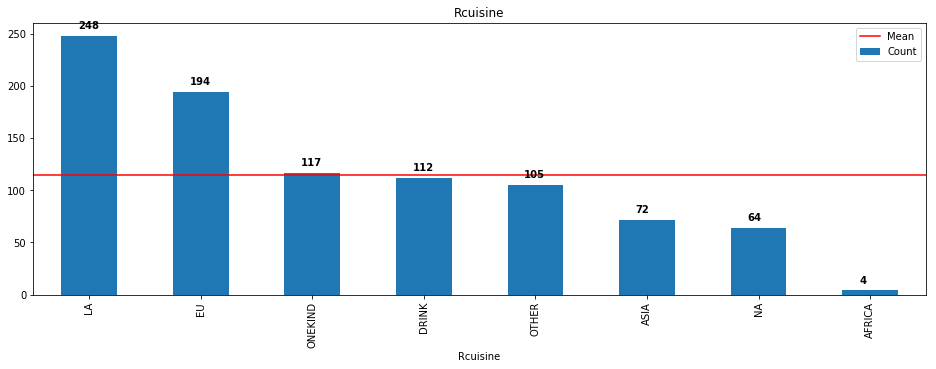

In [11]:
plotBars(resKit,'Rcuisine','placeID') 

### Shedule

In [12]:
resSh = pd.read_csv('1_rest3_horario.csv')
nrs = len(resSh)
resSh.info()
resSh.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
placeID    2339 non-null int64
hours      2339 non-null object
days       2339 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;


In [13]:
a = resSh['hours'].unique()
print('Shedules:',len(a))

Shedules: 273


In [14]:
dates_list = [dateTrans(date) for date in resSh['hours']]

resShTime = pd.DataFrame()
for col in range(0,48):
    resShTime[col] = ''
for i in range(0,nrs):
    resShTime.loc[i] = getDateDummies(dates_list[i])
    
originalArr = resSh['days']
originalArr = originalArr
resShTime = pd.concat([originalArr, resShTime], axis=1)
res = resShTime.groupby('days').sum().copy()

***Restaurant count: 694


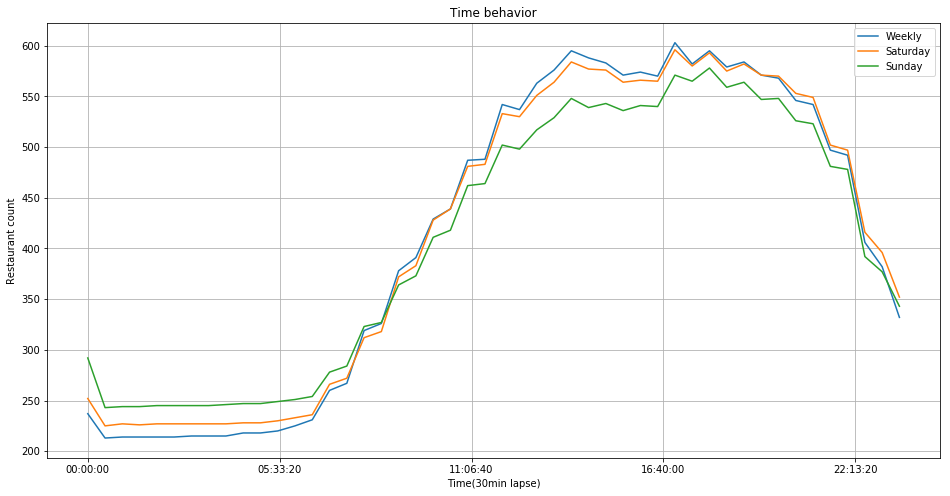

In [15]:
a = len(resSh['placeID'].unique())
print('***Restaurant count:', a)

plt.figure(figsize=(16,8))
tms = pd.date_range(start='1/1/1900', periods=48, freq='30min').time
plt.plot(tms, res.iloc[0])
plt.plot(tms, res.iloc[1])
plt.plot(tms, res.iloc[2])
plt.legend(['Weekly','Saturday','Sunday'])
plt.xlabel('Time(30min lapse)')
plt.ylabel('Restaurant count')
plt.title('Time behavior')
plt.grid(True)
plt.show()

### Parking

In [16]:
resPk = pd.read_csv('1_rest4_estacionamiento.csv')
resPk.info()
nrpk = len(resPk)
#Frequency dummy variable
resPk['parkingFreq'], parkFreqs = getFreqDummies(resPk,'placeID', 'parking_lot', nrpk)
resPk.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
placeID        702 non-null int64
parking_lot    702 non-null object
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


,placeID,parking_lot,parkingFreq
0,135111,public,0.145299
1,135110,none,0.495726
2,135109,none,0.495726


***Restaurant count: 675


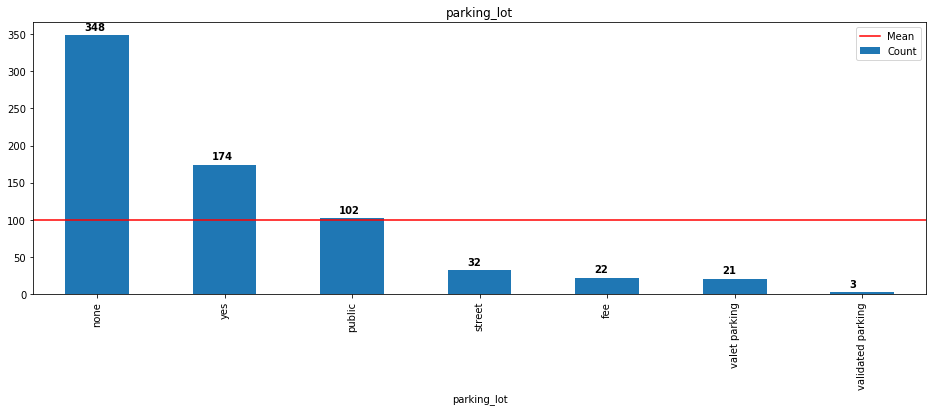

In [17]:
plotBars(resPk,'parking_lot','placeID') 

### Profile

In [18]:
resPf = pd.read_csv('1_rest5_perfil.csv')
nrpf = len(resPf)

# Cleansing data
resPf['country'] = 'Mexico'     #country
resPf.loc[resPf.url=='?', 'url'] = 0    #url
resPf.loc[resPf.url!=0, 'url'] = 1

nominales = ['city','state','alcohol','smoking_area','dress_code','accessibility','price']
for nom in nominales:
    cad = nom + 'Freq'
    resPf[cad], profFreqs = getFreqDummies(resPf,'placeID', nom, nrpf)
resPf.info()
resPf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 28 columns):
placeID              130 non-null int64
latitude             130 non-null float64
longitude            130 non-null float64
the_geom_meter       130 non-null object
name                 130 non-null object
address              130 non-null object
city                 130 non-null object
state                130 non-null object
country              130 non-null object
fax                  130 non-null object
zip                  130 non-null object
alcohol              130 non-null object
smoking_area         130 non-null object
dress_code           130 non-null object
accessibility        130 non-null object
price                130 non-null object
url                  130 non-null object
Rambience            130 non-null object
franchise            130 non-null object
area                 130 non-null object
other_services       130 non-null object
cityFreq             130 non-null

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,franchise,area,other_services,cityFreq,stateFreq,alcoholFreq,smoking_areaFreq,dress_codeFreq,accessibilityFreq,priceFreq
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,f,closed,none,0.115385,0.146154,0.669231,0.538462,0.907692,0.584615,0.461538
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,Mexico,?,...,f,open,none,0.007692,0.007692,0.669231,0.538462,0.907692,0.346154,0.346154
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,f,open,none,0.492308,0.107692,0.261538,0.015385,0.907692,0.069231,0.461538
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,Mexico,?,...,t,closed,none,0.015385,0.069231,0.669231,0.538462,0.907692,0.346154,0.346154
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,t,closed,none,0.076923,0.053846,0.669231,0.069231,0.907692,0.346154,0.461538


***Restaurant count: 130


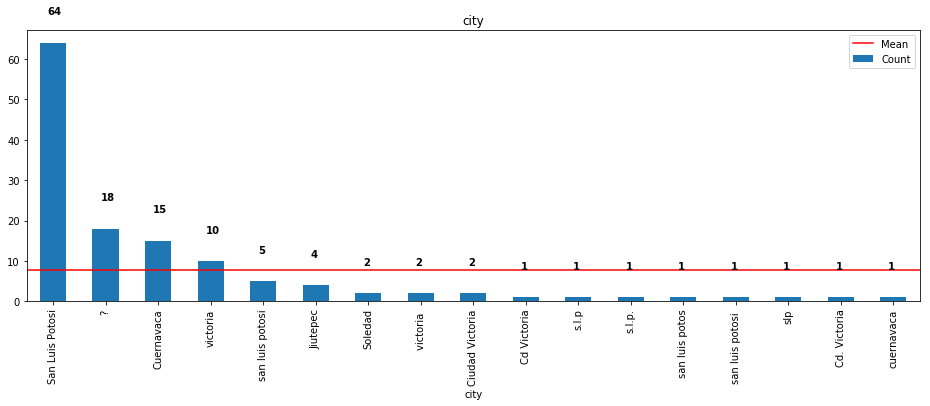

***Restaurant count: 130


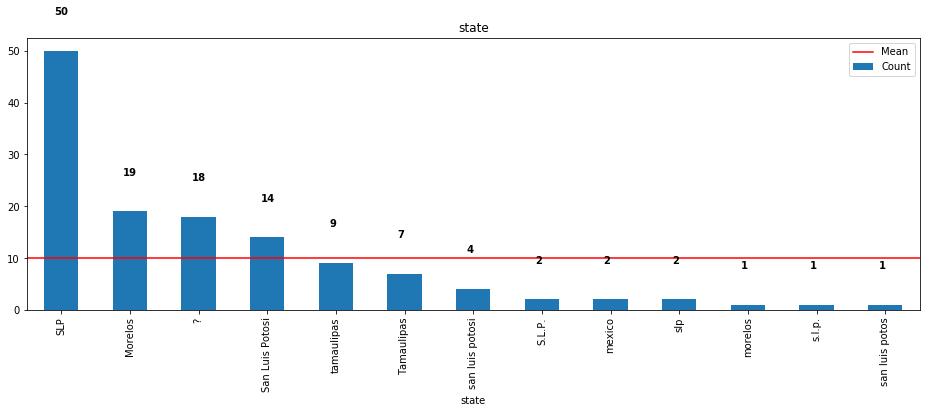

***Restaurant count: 130


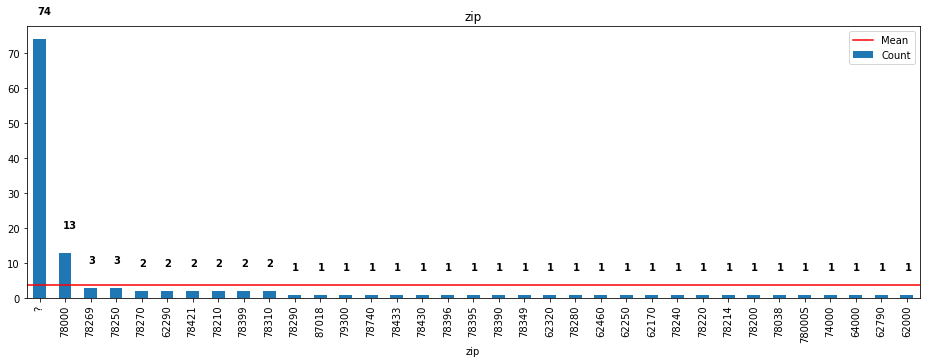

***Restaurant count: 130


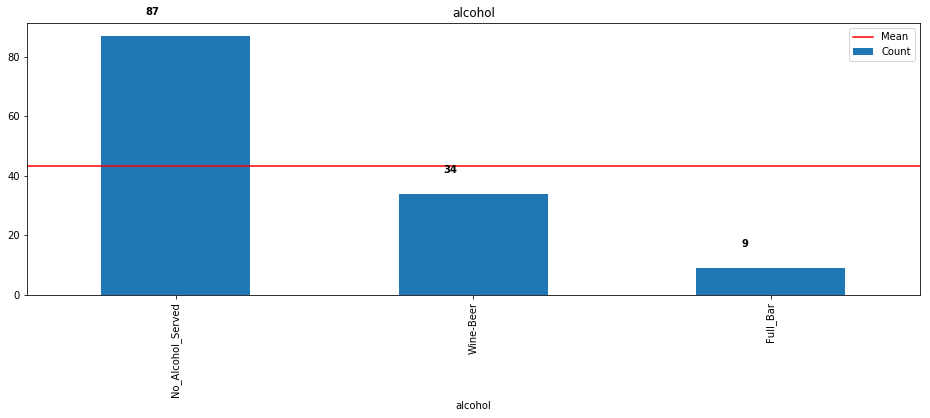

***Restaurant count: 130


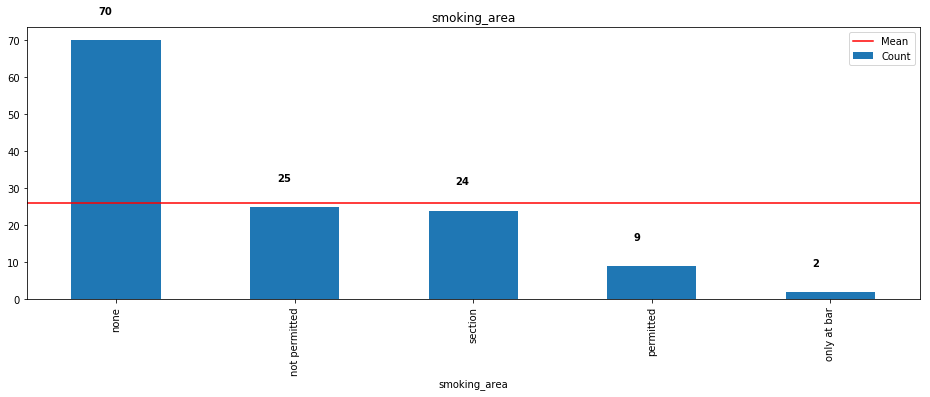

***Restaurant count: 130


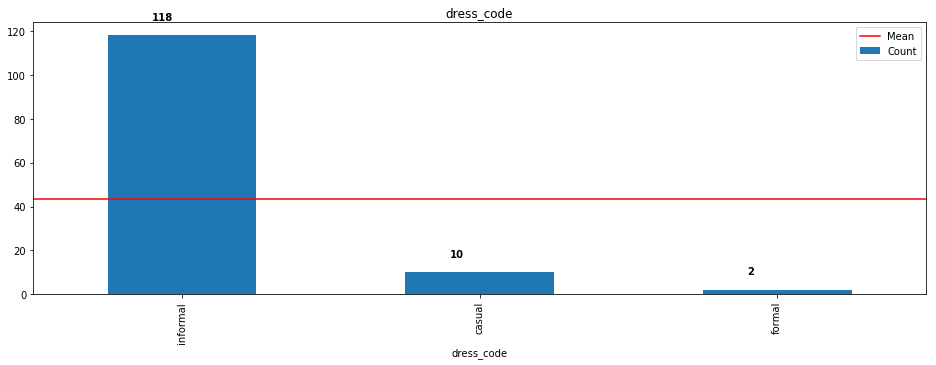

***Restaurant count: 130


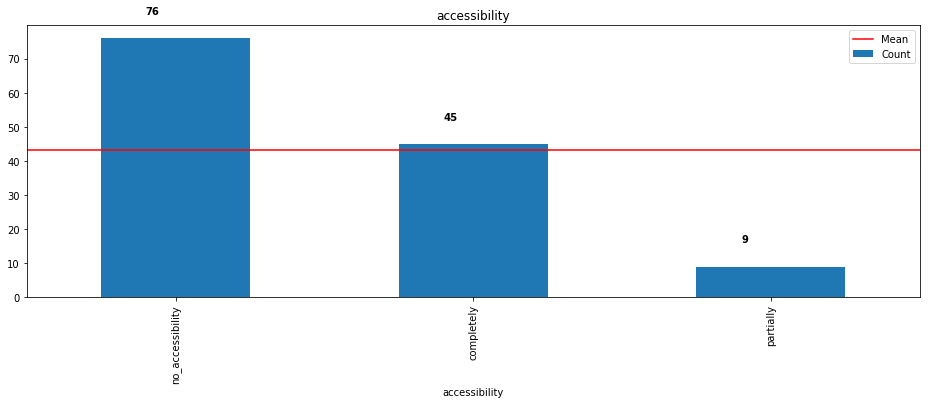

***Restaurant count: 130


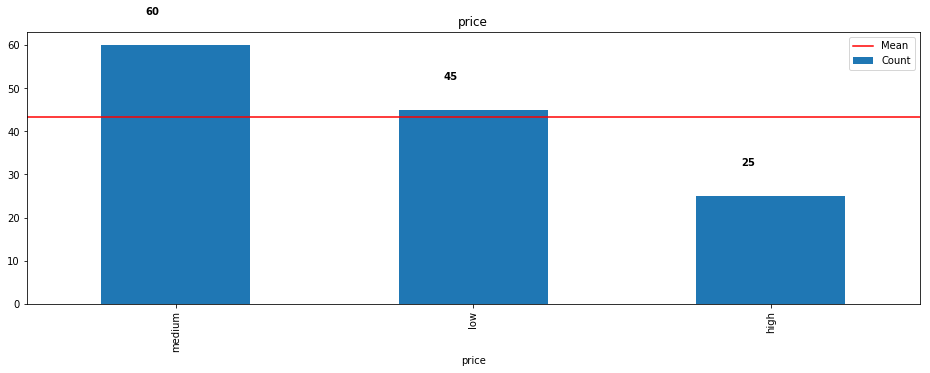

***Restaurant count: 130


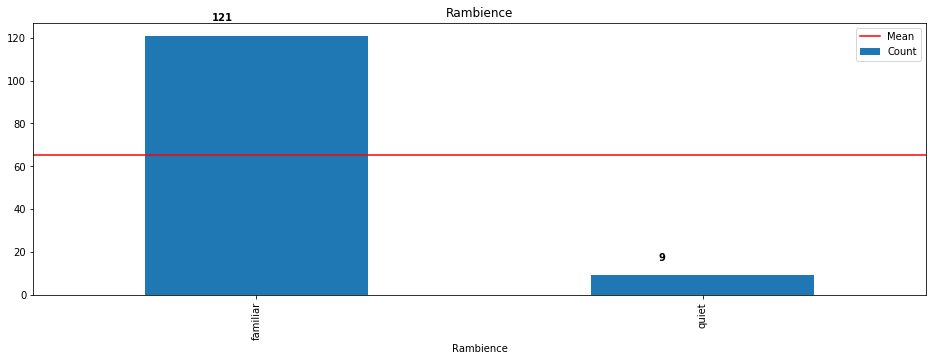

***Restaurant count: 130


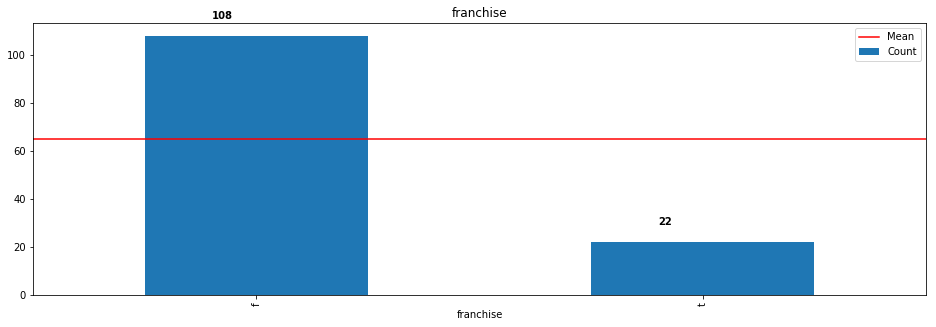

***Restaurant count: 130


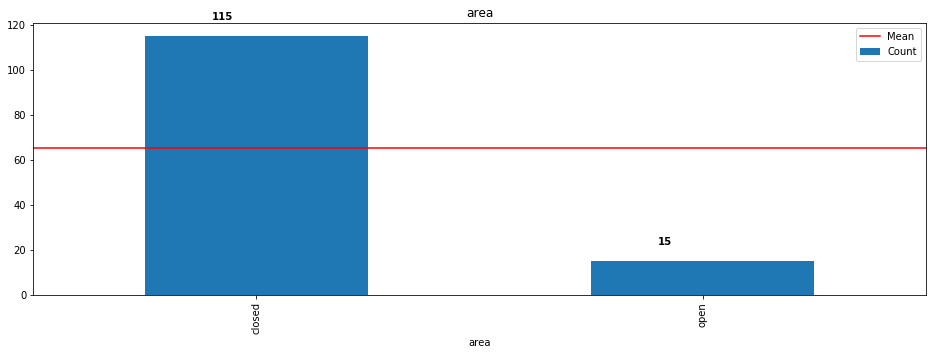

***Restaurant count: 130


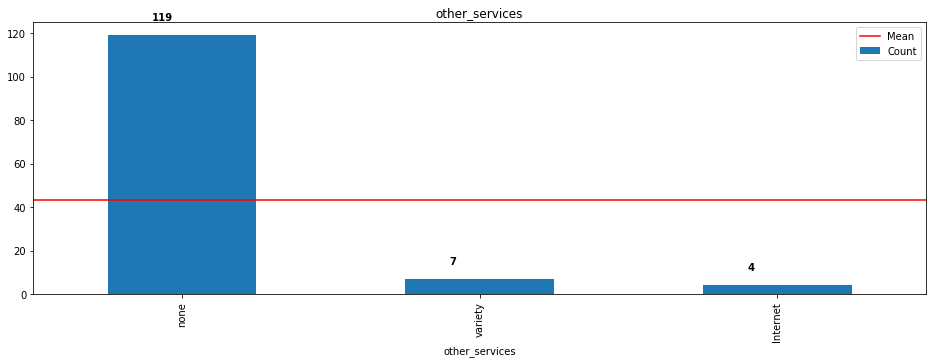

In [19]:
fieldID = 'placeID'
fields = ['city','state', 'zip', 'alcohol','smoking_area',
          'dress_code','accessibility','price','Rambience','franchise','area','other_services']
for f in fields:
    df = resPf[[fieldID, f]]
    plotBars(df, f, fieldID) 

#### Merge datasets

In [20]:
restaurant = pd.merge(resPay, resKit, on='placeID', how='outer')
#restaurant = pd.merge(restaurant, resSh, on='placeID', how='outer')
restaurant = pd.merge(restaurant, resPk, on='placeID', how='outer')
restaurant = pd.merge(restaurant, resPf, on='placeID', how='outer')
restaurant.head(5)

,placeID,Rpayment,PaymentFreq,Rcuisine,cuisineFreq,parking_lot,parkingFreq,latitude,longitude,the_geom_meter,...,franchise,area,other_services,cityFreq,stateFreq,alcoholFreq,smoking_areaFreq,dress_codeFreq,accessibilityFreq,priceFreq
0,135110,cash,0.380518,EU,0.21179,none,0.495726,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135110,VISA,0.194064,EU,0.21179,none,0.495726,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,135110,MasterCard-Eurocard,0.147641,EU,0.21179,none,0.495726,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135110,American_Express,0.116438,EU,0.21179,none,0.495726,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,135110,bank_debit_cards,0.098935,EU,0.21179,none,0.495726,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rating analysis

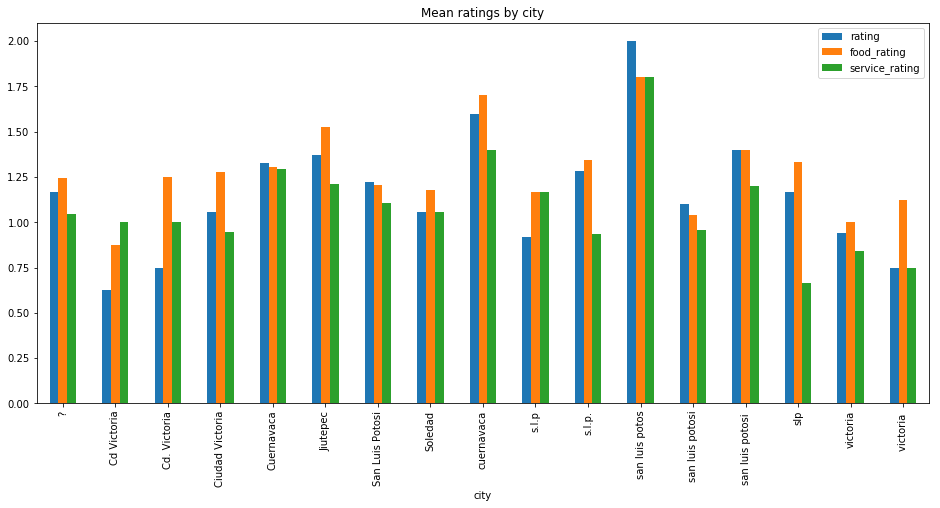

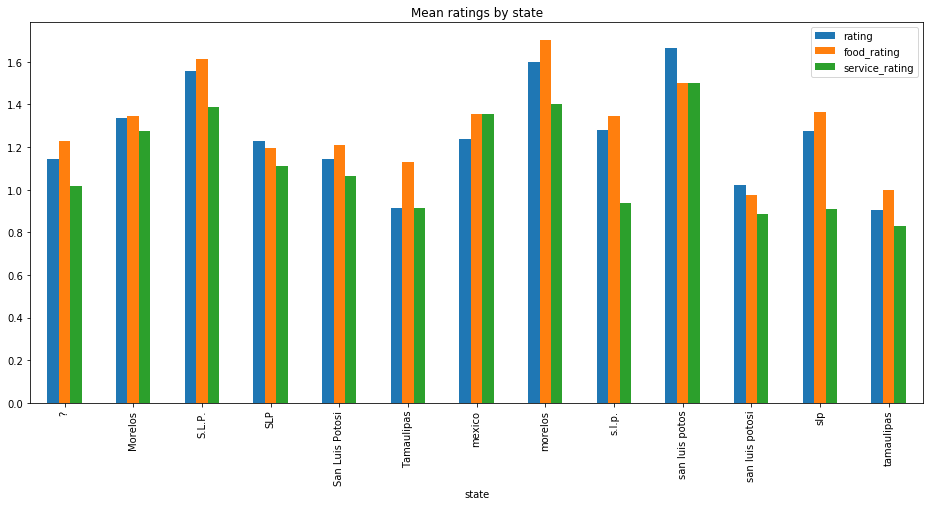

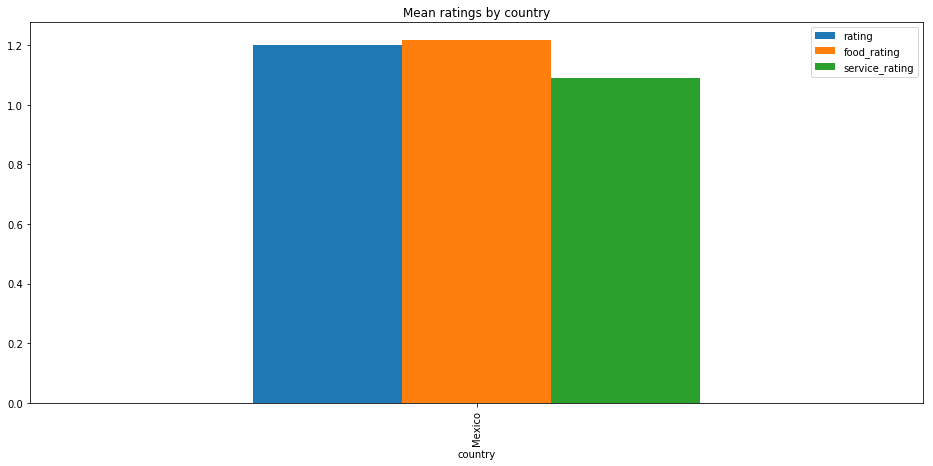

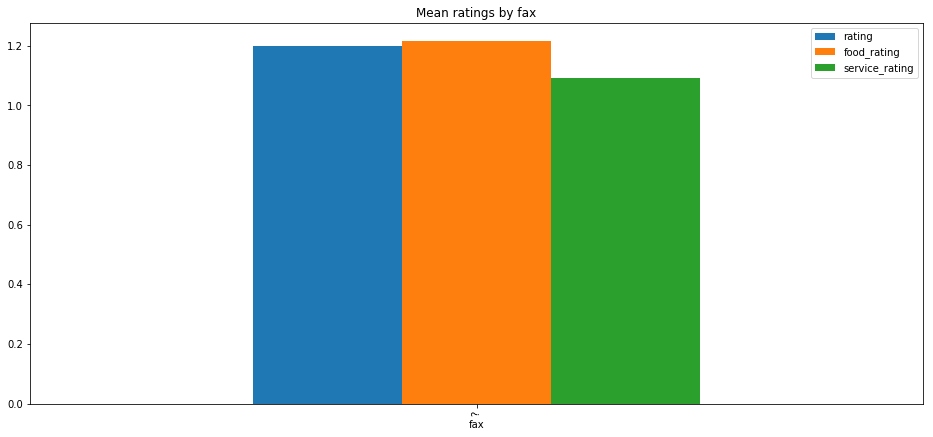

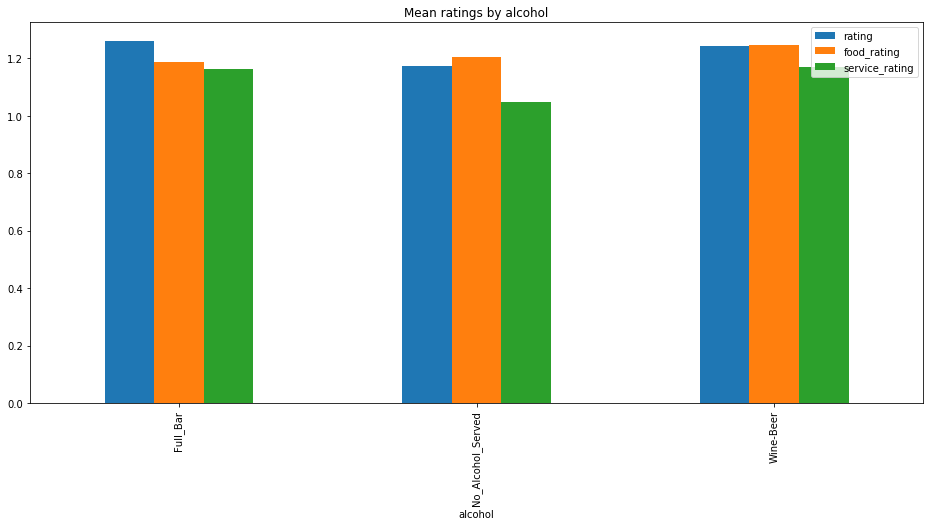

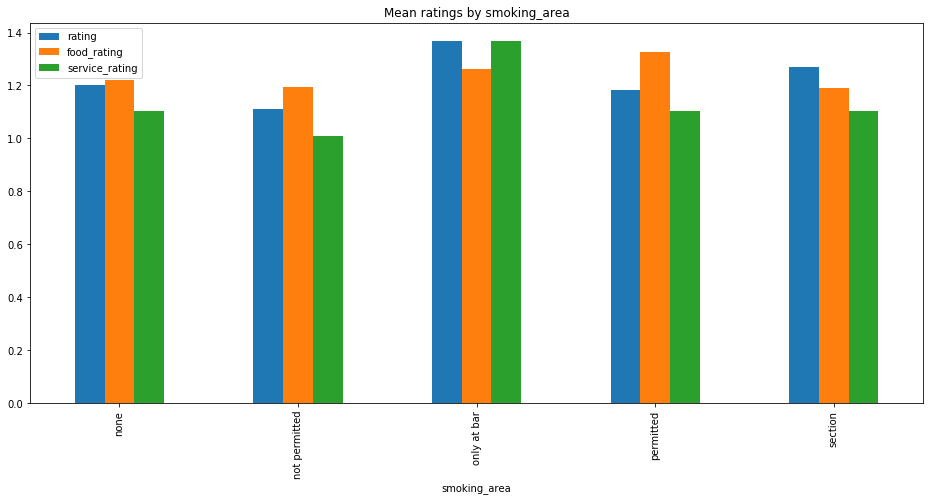

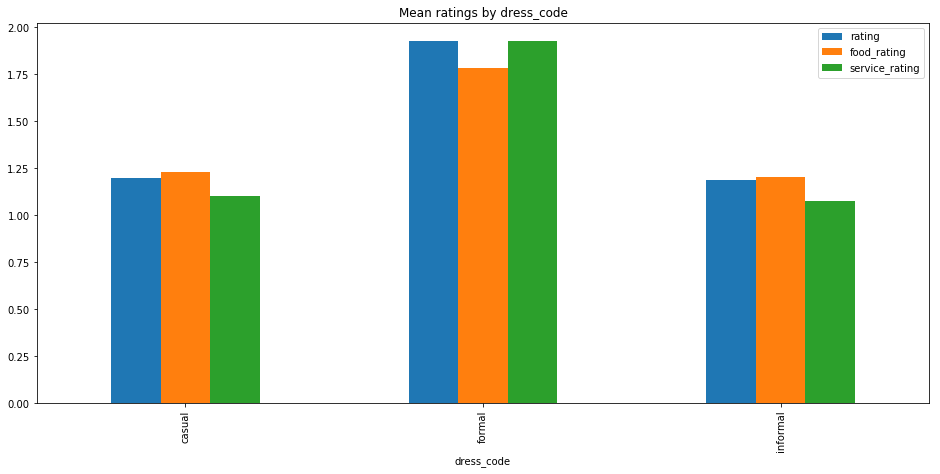

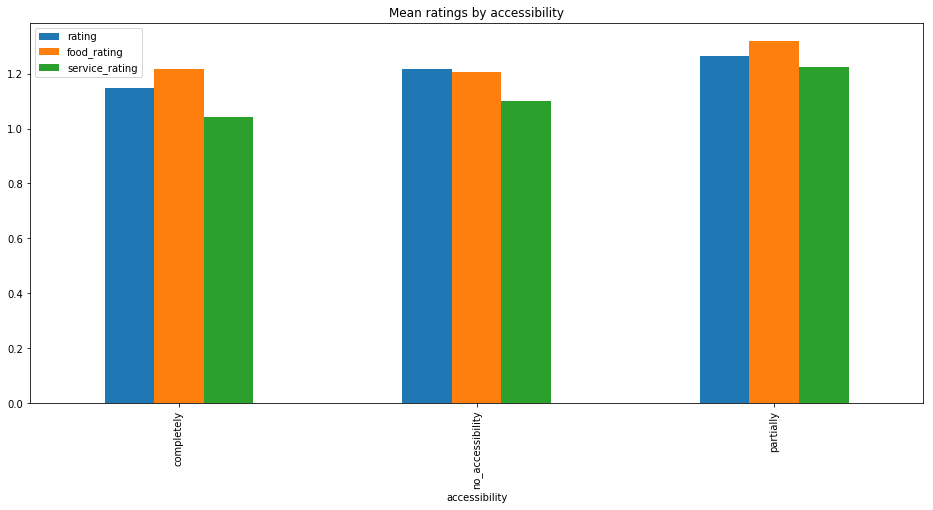

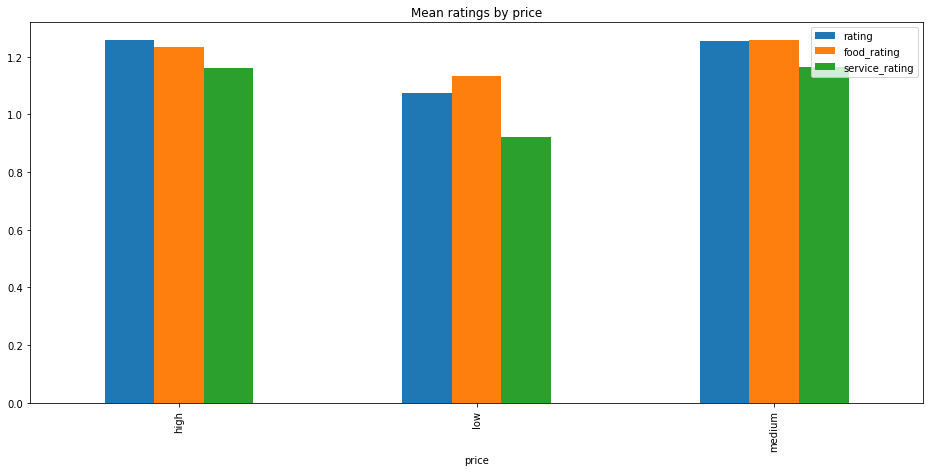

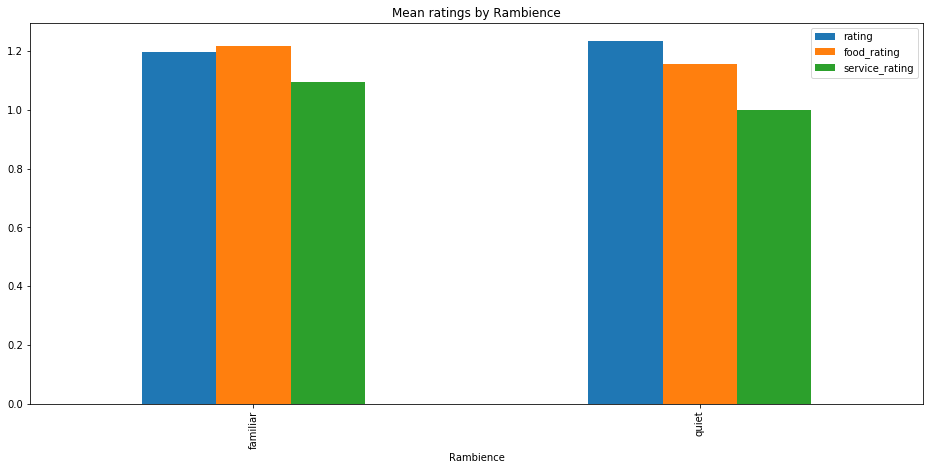

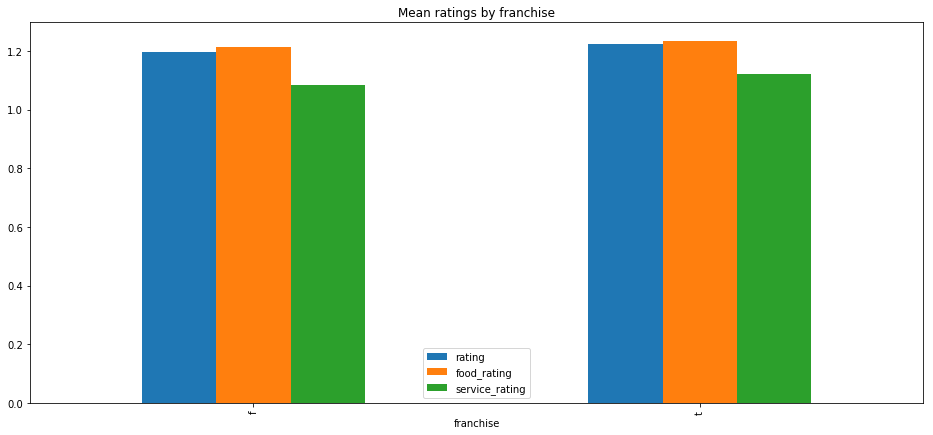

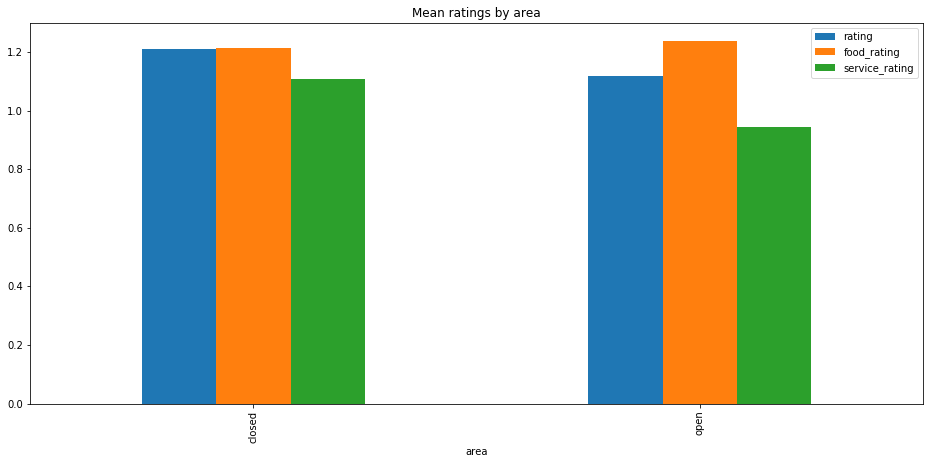

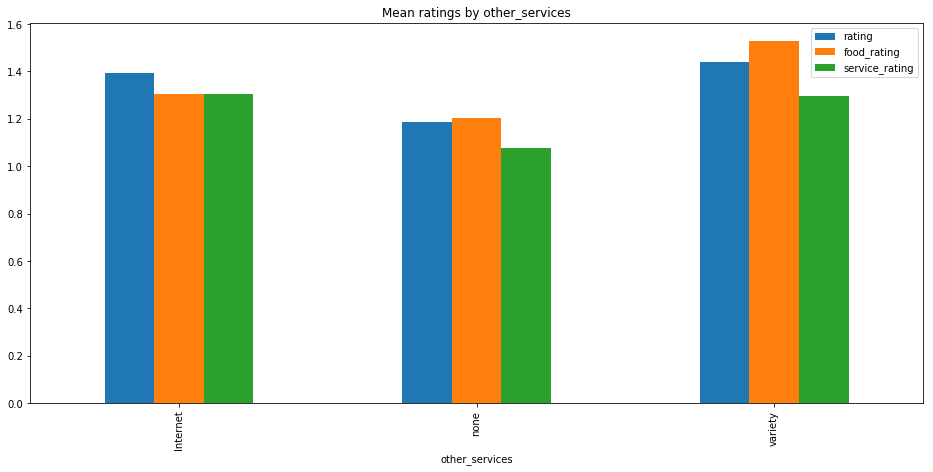

In [21]:
fieldID = 'placeID'
fields = ['city','state', 'country', 'fax', 'alcohol','smoking_area',
          'dress_code','accessibility','price','Rambience','franchise','area','other_services']
for f in fields:
    aux = pd.merge(resPf[[fieldID,f]], ratings, on=fieldID, how='outer')
    aux = (aux[[f,'rating','food_rating','service_rating',]]
           .groupby([f])
           .mean())
    cad = 'Mean ratings by ' + f
    aux.plot.bar(figsize=(16,7), title=cad)
    plt.show()

## ---------------------------------------- Users ---------------------------------------- 

### Kitchen

In [22]:
usrKit = pd.read_csv('2_User_cocina.csv')
nuk = len(usrKit)

#Group cuisine by region:
transCusine(usrKit)

# Cleansing data
#usrRt = getFreqDummys(usrRt, 'Rcuisine')
usrKit['cuisineFreq'], _ = getFreqDummies(usrKit,'userID', 'Rcuisine', nuk, restFreqs, flag=1)
usrKit.info()
usrKit.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
userID         330 non-null object
Rcuisine       330 non-null object
cuisineFreq    330 non-null float64
dtypes: float64(1), object(2)
memory usage: 7.8+ KB


,userID,Rcuisine,cuisineFreq
0,U1001,NA,0.069869
1,U1002,LA,0.270742
2,U1003,LA,0.270742


***Restaurant count: 138


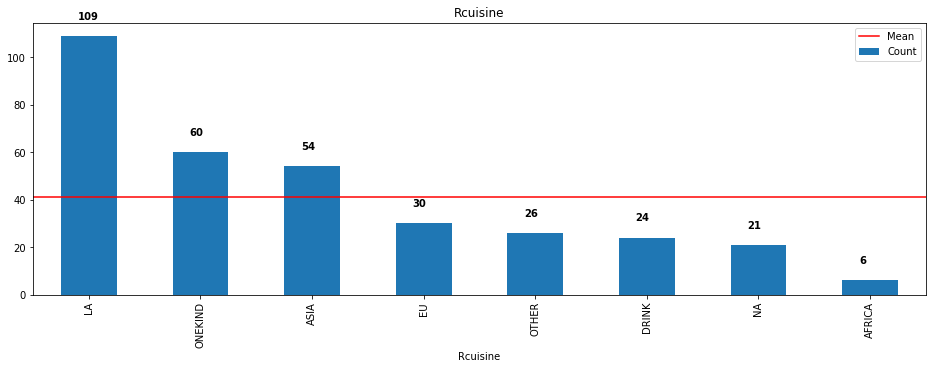

In [23]:
plotBars(usrKit,'Rcuisine','userID') 

### Pago

In [24]:
usrPay = pd.read_csv('2_user_pago.csv')
nupy = len(usrPay)

usrPay['PaymentFreq'], _ = getFreqDummies(usrPay,'userID', 'Upayment', nupy, payFreqs, flag=1)

usrPay.info()
usrPay.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
userID         177 non-null object
Upayment       177 non-null object
PaymentFreq    177 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.2+ KB


,userID,Upayment,PaymentFreq
0,U1001,cash,0.380518
1,U1002,cash,0.380518
2,U1003,cash,0.380518


***Restaurant count: 133


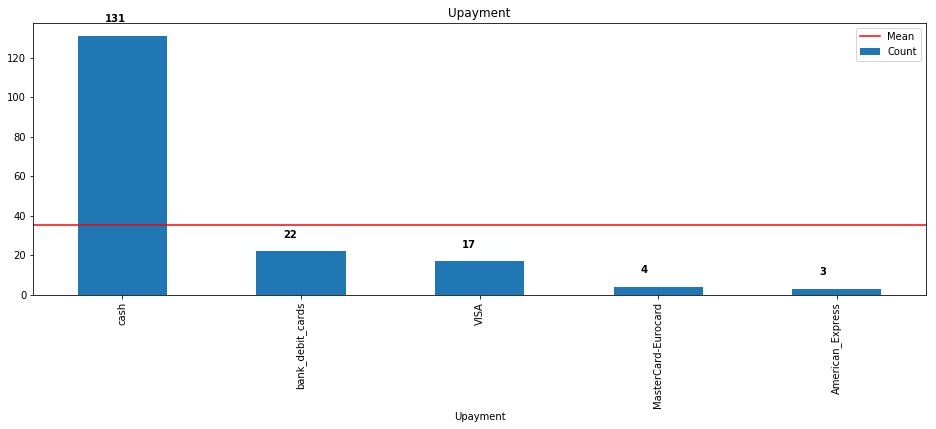

In [25]:
plotBars(usrPay,'Upayment','userID')

### Profile

In [26]:
usrPf = pd.read_csv('2_user_perfil.csv')
nupf = len(usrPf)
# Cleansing data
#-----------------------Create age--------------------------
usrPf['age'] = dt.datetime.now().year - usrPf['birth_year']
#-----------------------Delete ? rows-----------------------
#msk = (usrPf[['userID','smoker','drink_level','dress_preference','ambience','transport','marital_status','hijos','interest','personality','religion','activity','color','budget']] == '?').any(axis=1)
#print('***** Drop', np.sum(msk),'rows')
#toDelete = usrPf[msk].index
#usrPf.drop(toDelete, inplace=True)
#----------------------Nominal variables--------------------
usrPf.loc[usrPf.smoker == 'true', 'smoker'] = 1    #smoker
usrPf.loc[usrPf.smoker == 'false', 'smoker'] = 0

fields = ['drink_level','dress_preference','ambience',
          'transport','marital_status','hijos',
          'interest','personality','religion','activity','color','budget']
for f in fields:
    #Frequency nominal variables
    cad = f+'Freq'
    usrPf[cad], _ = getFreqDummies(usrPf,'userID', f, nupf)


usrPf.info()
usrPf.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 32 columns):
userID                  138 non-null object
latitude                138 non-null float64
longitude               138 non-null float64
smoker                  138 non-null object
drink_level             138 non-null object
dress_preference        138 non-null object
ambience                138 non-null object
transport               138 non-null object
marital_status          138 non-null object
hijos                   138 non-null object
birth_year              138 non-null int64
interest                138 non-null object
personality             138 non-null object
religion                138 non-null object
activity                138 non-null object
color                   138 non-null object
weight                  138 non-null int64
budget                  138 non-null object
height                  138 non-null float64
age                     138 non-null int64
drink_levelFreq

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,ambienceFreq,transportFreq,marital_statusFreq,hijosFreq,interestFreq,personalityFreq,religionFreq,activityFreq,colorFreq,budgetFreq
0,U1001,22.139997,-100.978803,0,abstemious,informal,family,on foot,single,independent,...,0.507246,0.101449,0.884058,0.818841,0.362319,0.420290,0.217391,0.818841,0.152174,0.659420
1,U1002,22.150087,-100.983325,0,abstemious,informal,family,public,single,independent,...,0.507246,0.594203,0.884058,0.818841,0.260870,0.086957,0.717391,0.818841,0.108696,0.253623
2,U1003,22.119847,-100.946527,0,social drinker,formal,family,public,single,independent,...,0.507246,0.594203,0.884058,0.818841,0.217391,0.442029,0.717391,0.818841,0.326087,0.253623


***Restaurant count: 138


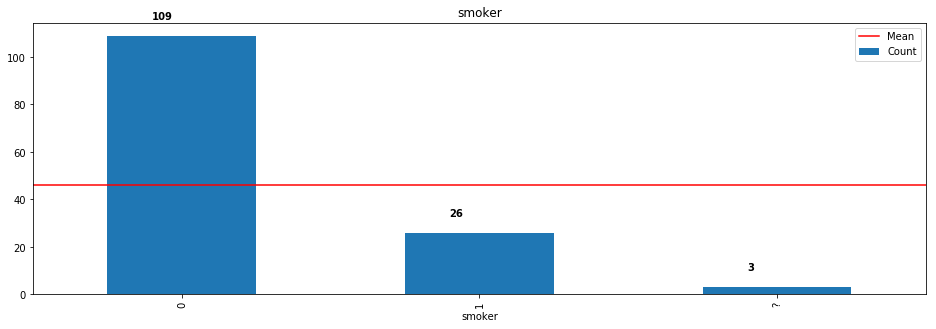

***Restaurant count: 138


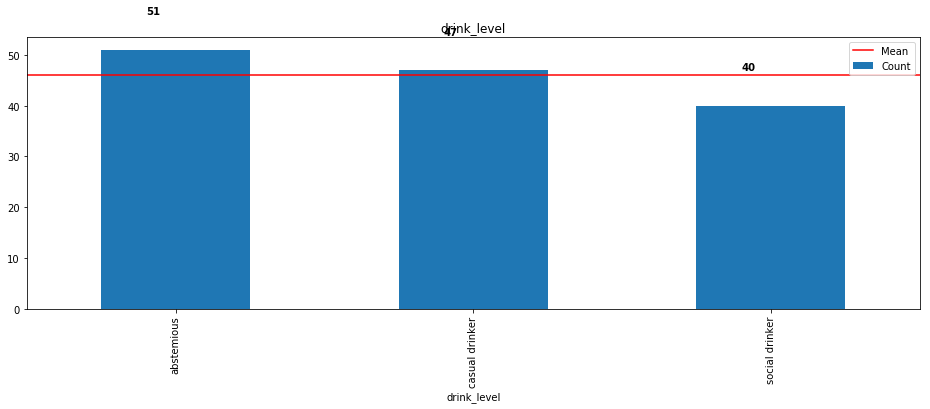

***Restaurant count: 138


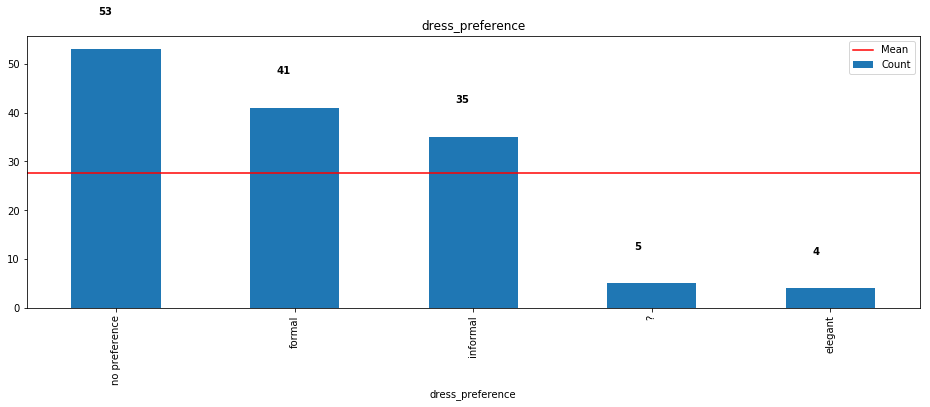

***Restaurant count: 138


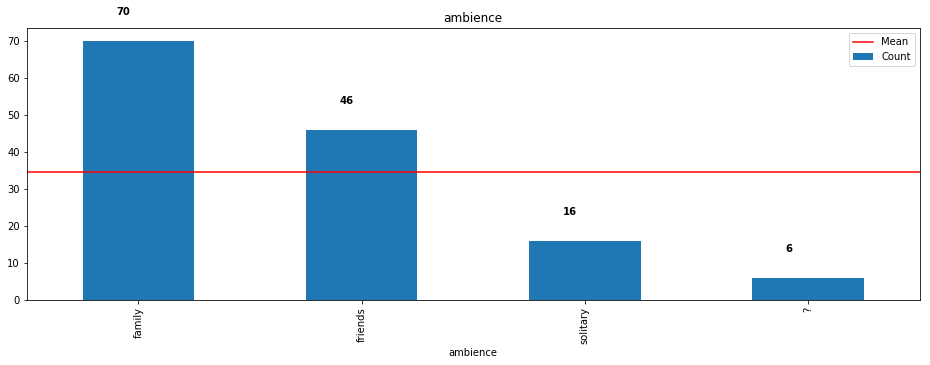

***Restaurant count: 138


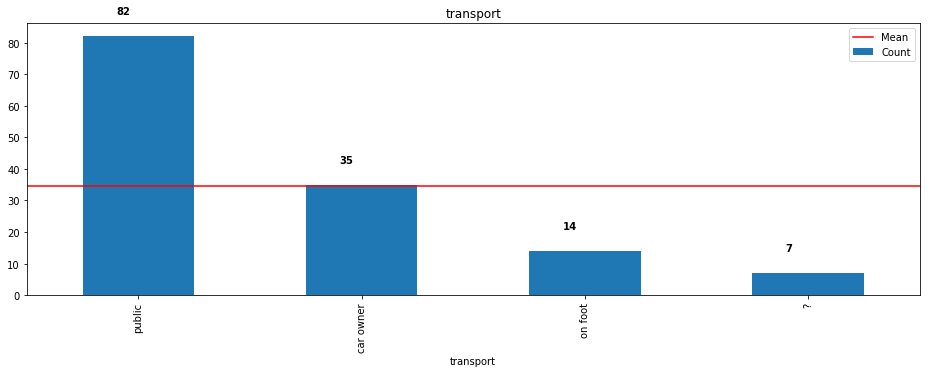

***Restaurant count: 138


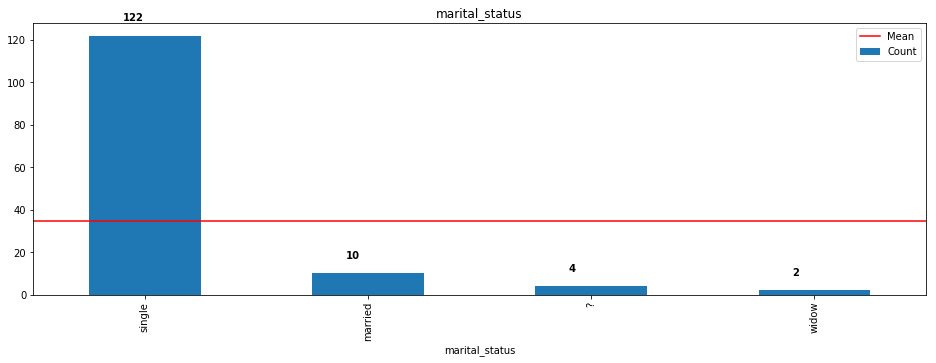

***Restaurant count: 138


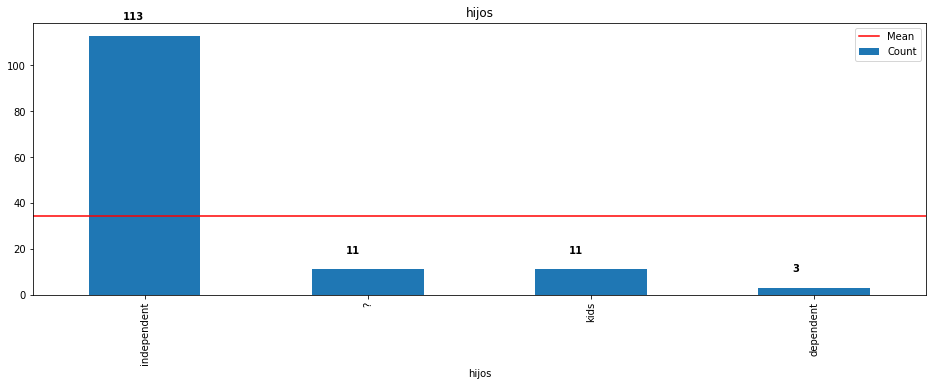

***Restaurant count: 138


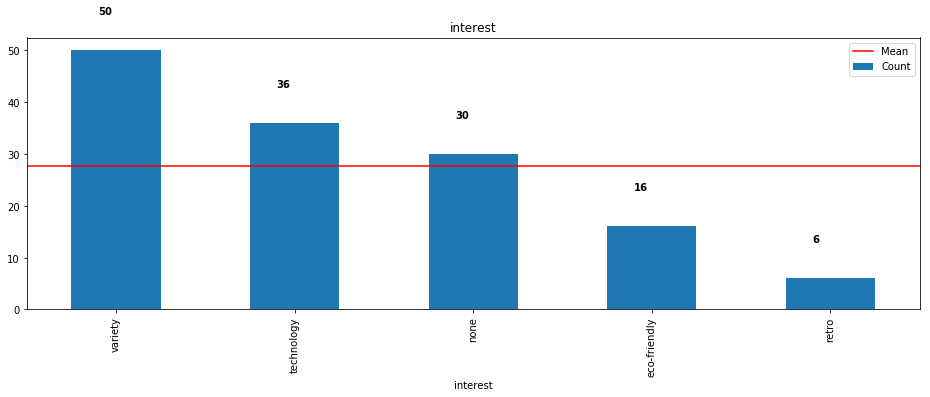

***Restaurant count: 138


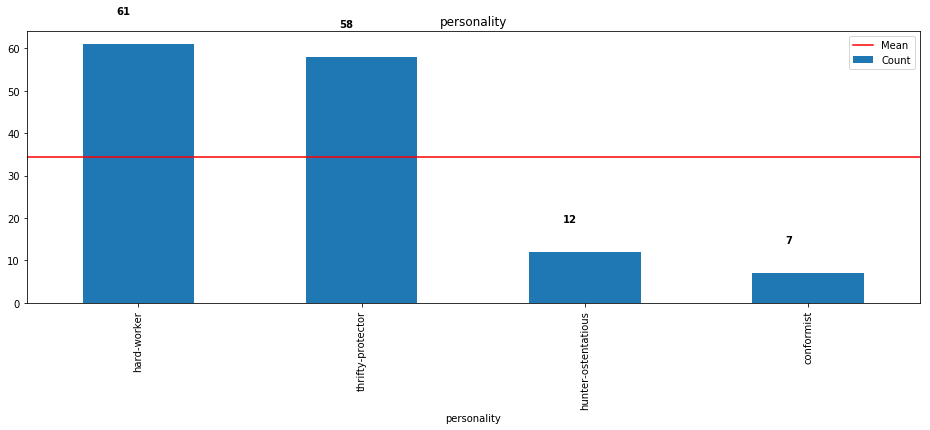

***Restaurant count: 138


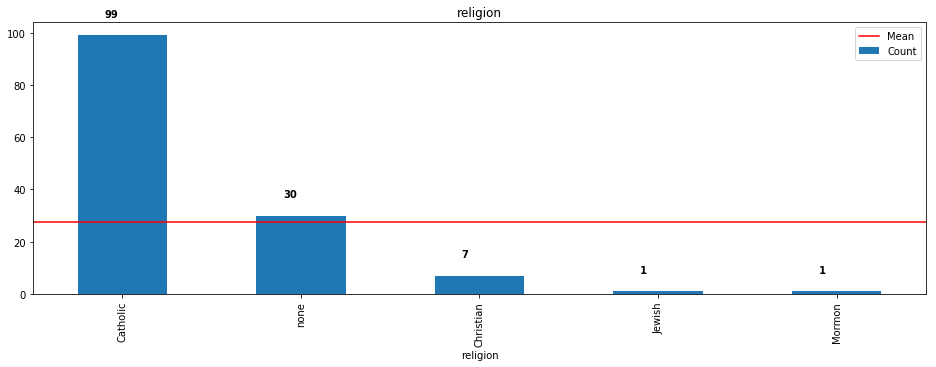

***Restaurant count: 138


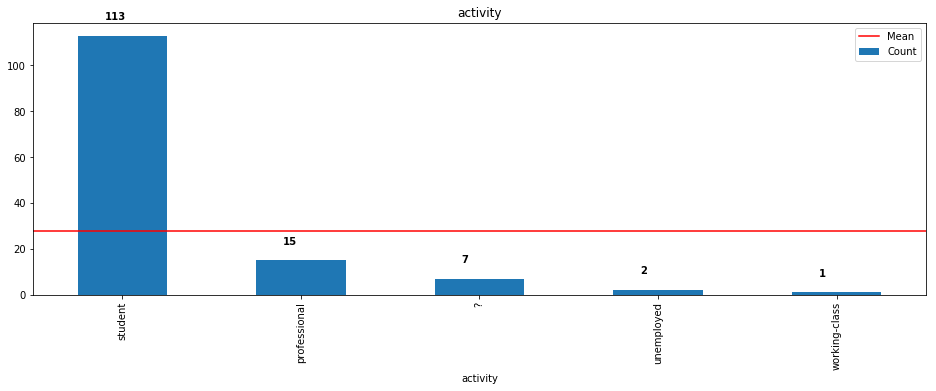

***Restaurant count: 138


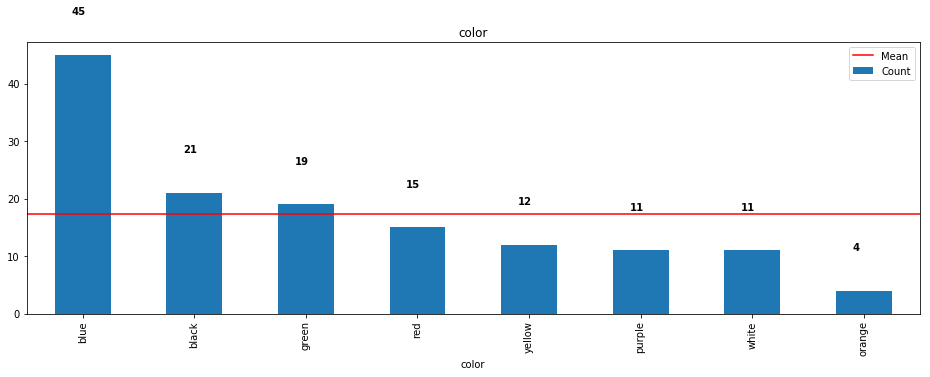

***Restaurant count: 138


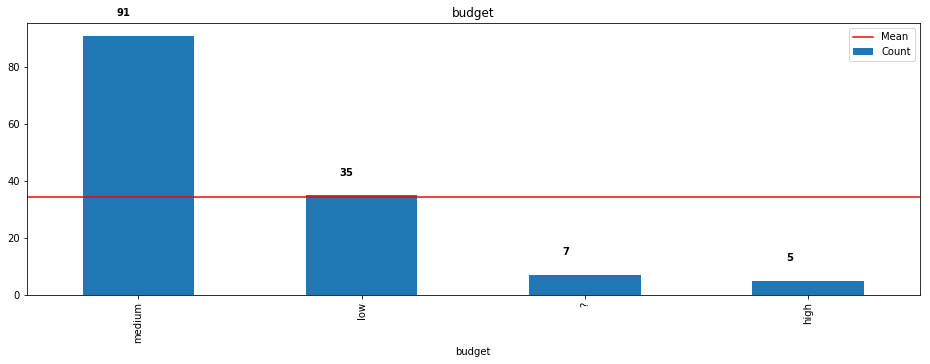

In [27]:
fieldID = 'userID'
fields = ['smoker','drink_level','dress_preference','ambience',
          'transport','marital_status','hijos',
          'interest','personality','religion','activity','color','budget']
for f in fields:
    df = usrPf[[fieldID, f]]
    plotBars(df, f, fieldID) 

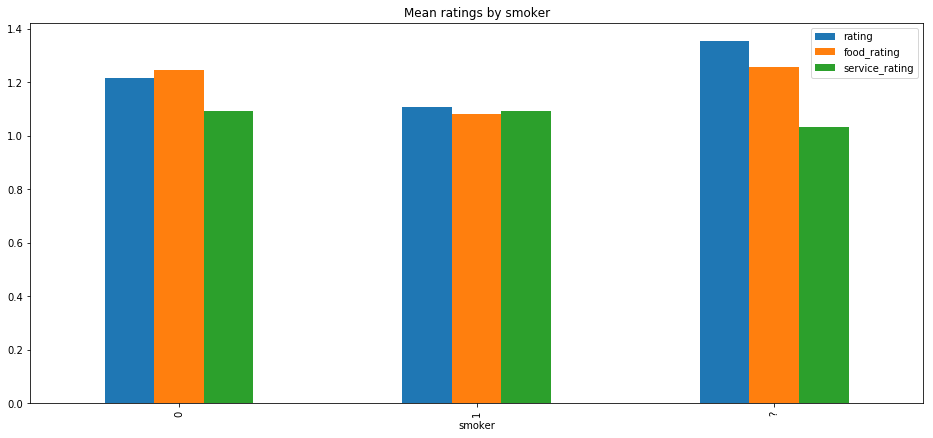

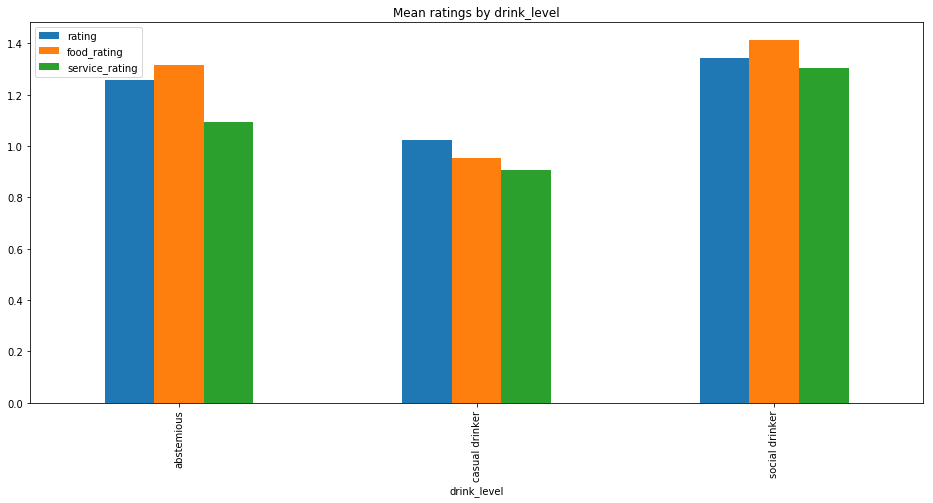

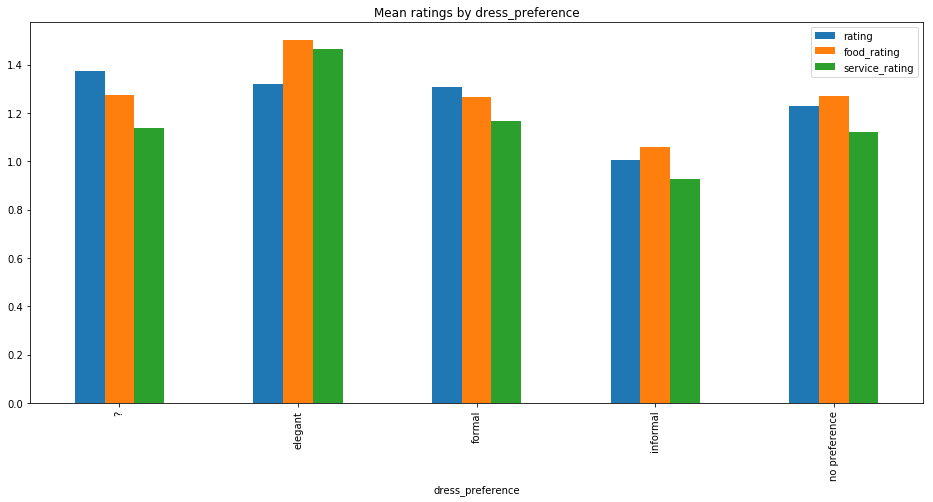

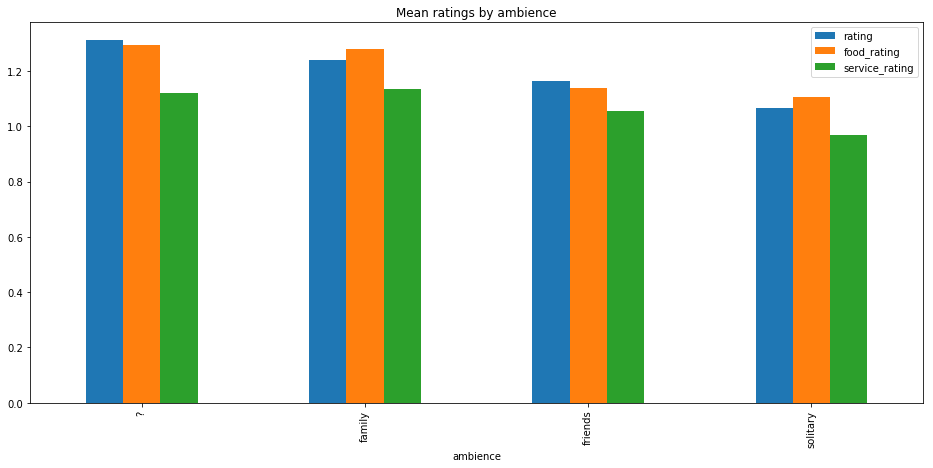

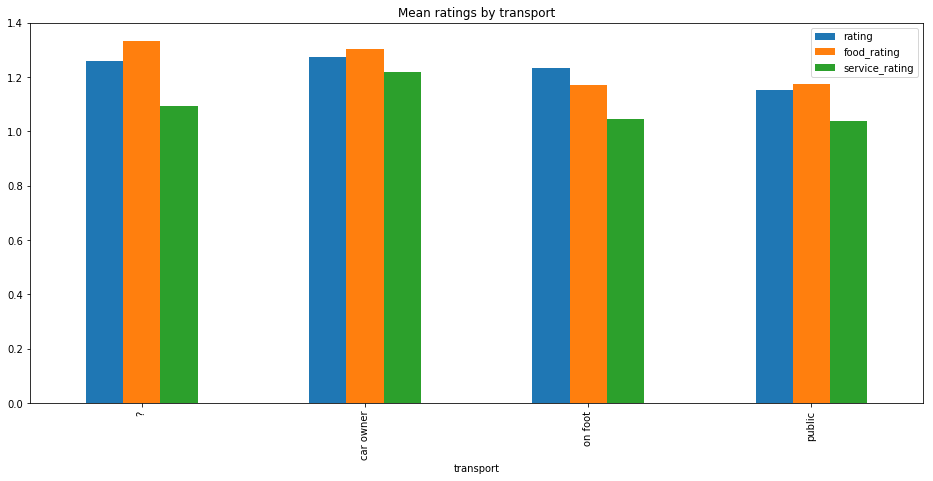

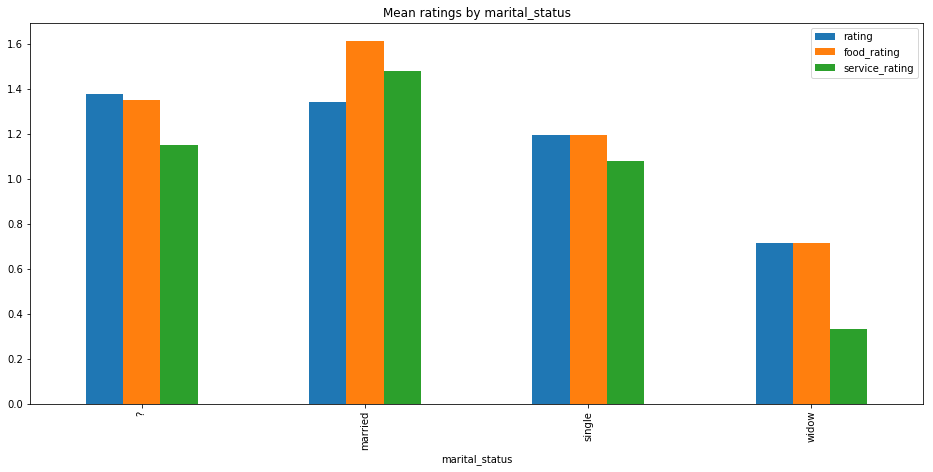

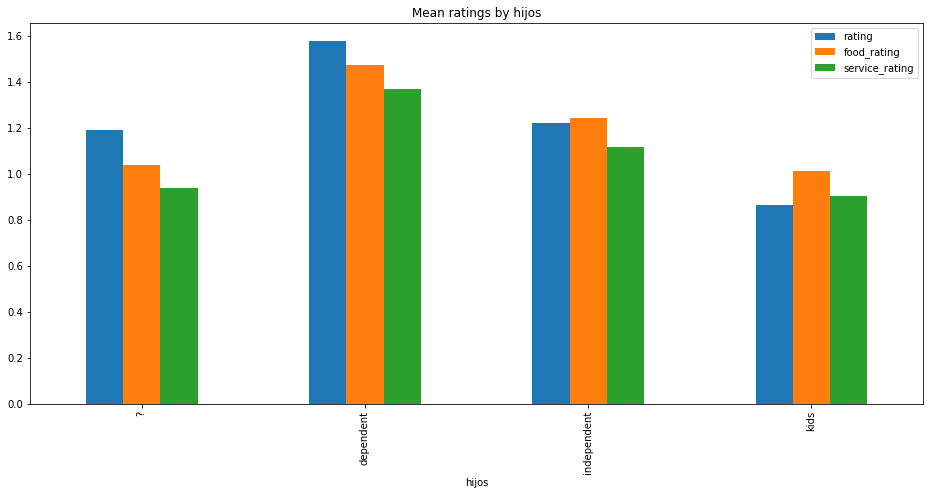

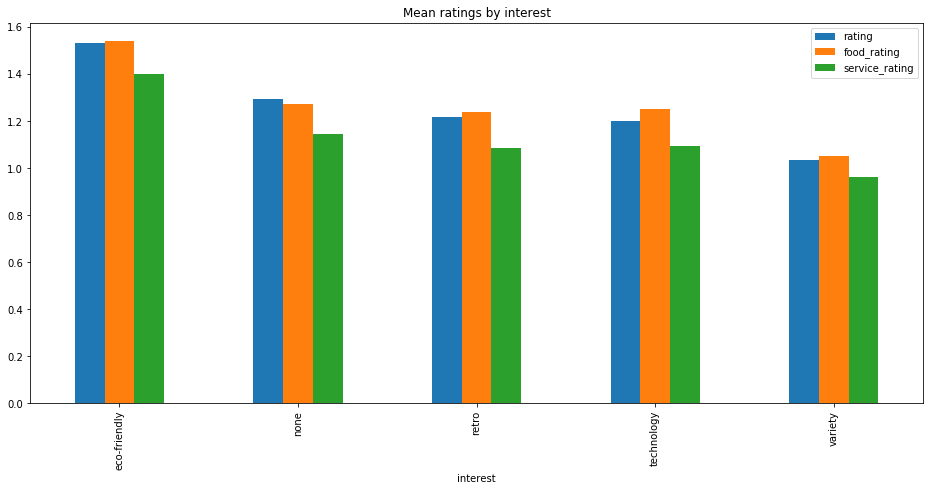

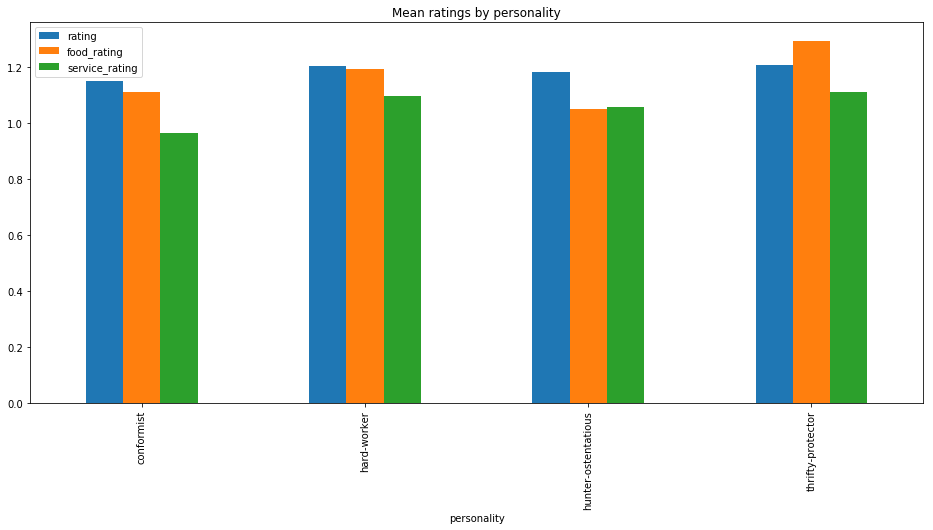

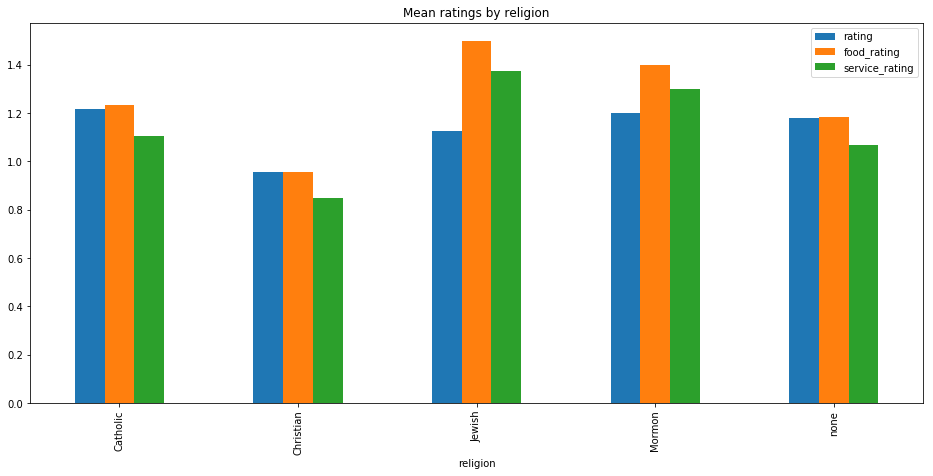

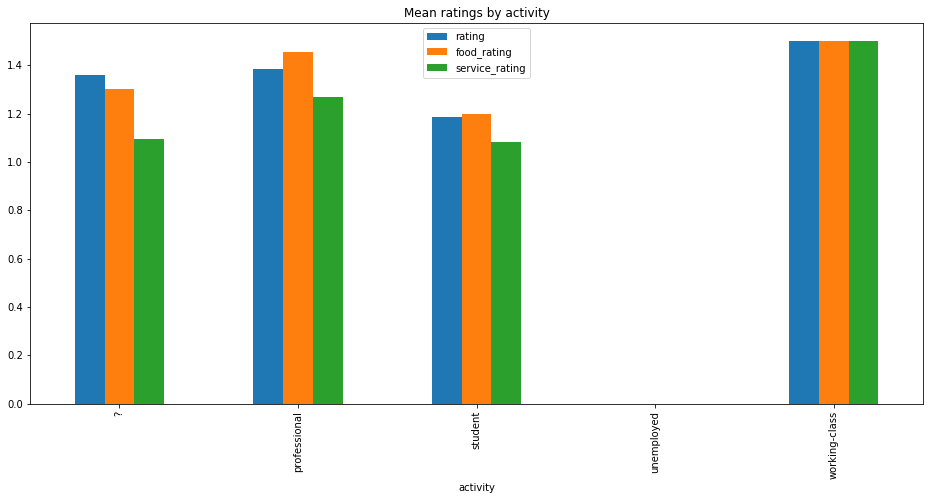

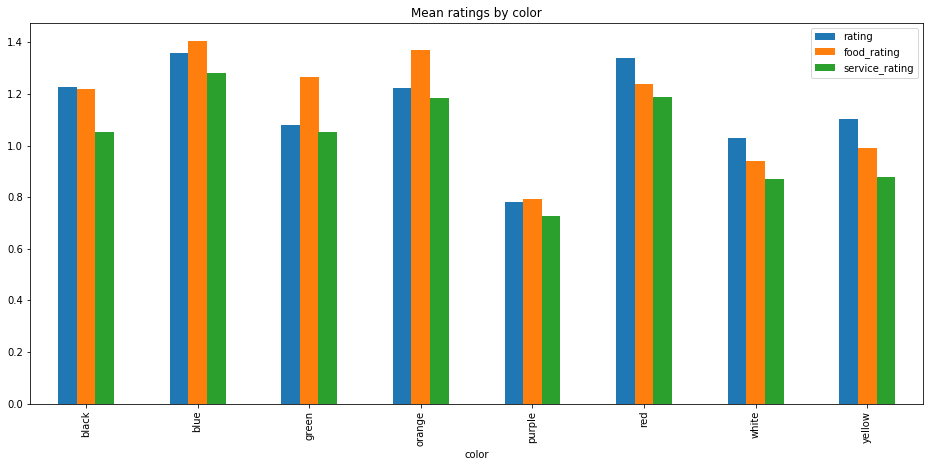

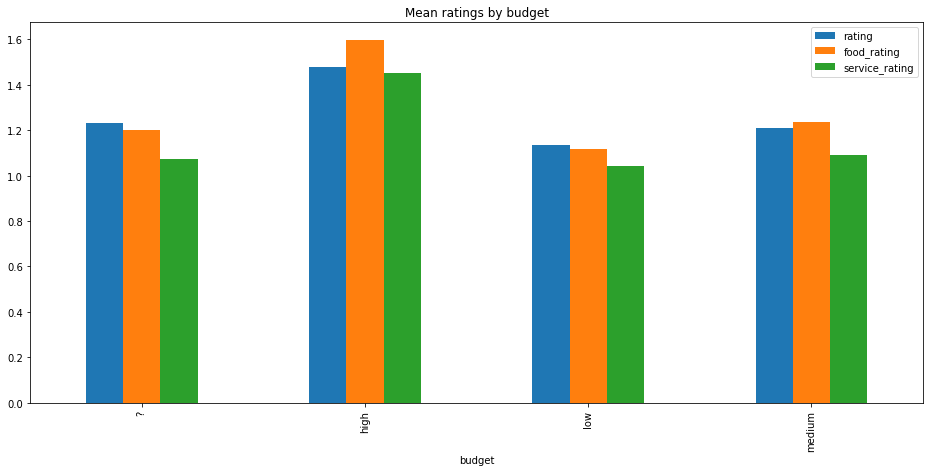

In [28]:
for f in fields:
    aux = pd.merge(usrPf[[fieldID,f]], ratings, on=fieldID, how='outer')
    aux = (aux[[f,'rating','food_rating','service_rating',]]
           .groupby([f])
           .mean())
    cad = 'Mean ratings by ' + f
    aux.plot.bar(figsize=(16,7), title=cad)
    plt.show()

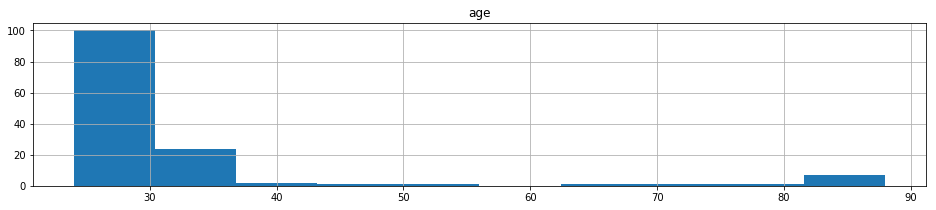

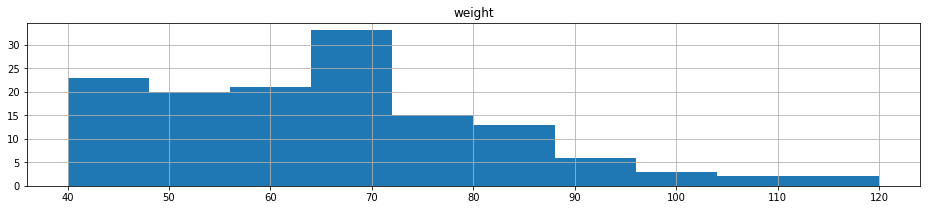

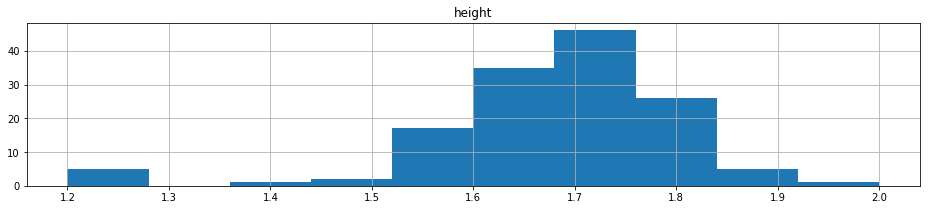

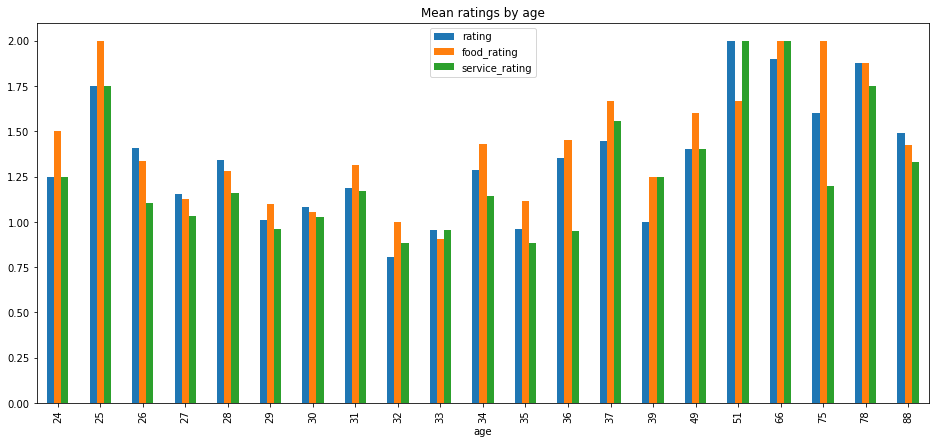

In [29]:
fields = ['age','weight','height']
for f in fields:
    plt.figure(figsize=(16,3))
    plt.title(f)
    usrPf[f].hist()
    plt.show()

aux = pd.merge(usrPf[[fieldID,'age']], ratings, on=fieldID, how='outer')
aux = (aux[['age','rating','food_rating','service_rating',]]
       .groupby(['age'])
       .mean())
aux.plot.bar(figsize=(16,7), title='Mean ratings by age')
plt.show()

In [30]:
#merge dataset
user = pd.merge(usrKit, usrPay, on='userID', how='outer')
user = pd.merge(user, usrPf, on='userID', how='outer')

### Correlation analysis

In [31]:
5+5

10